# GBM Geometry Demo
## J. Michael Burgess

**gbmeometry** is a module with routines for handling GBM geometry. It performs a few tasks:
* creates and astropy coordinate frame for Fermi GBM given a quarternion
* allows for coordinate transforms from Fermi frame to in astropy frame (J2000, etc.)
* plots the GBM NaI detectors at a given time for a given FOV
* determines if a astropy SkyCoord location is within an NaI's FOV
* creates interpolations over GBM quarternions and SC coordinates


In [2]:
%matplotlib notebook
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
from gbmgeometry import *


### Interpolating
First let's create an interpolating object for a given TRIGDAT file (POSHIST files are also readable)


In [2]:
interp = PositionInterpolator(trigdat="glg_trigdat_all_bn080916009_v02.fit")

In [3]:
# In trigger times
print ("Quaternions")
print (interp.quaternion(0))
print (interp.quaternion(10))
print
print ("SC XYZ")
print (interp.sc_pos(0))
print (interp.sc_pos(10))





Quaternions
[0.09894184 0.81399423 0.56763536 0.07357984]
[0.09651158 0.81315938 0.56970097 0.06998621]
SC XYZ
[3184.75 5985.5  1456.75]
[3111.77432458 6015.91372132 1488.98009345]


## Single detector

One can look at a single detector which knows about it's orientation in the Fermi SC coordinates





In [7]:
interp.quaternion(1)

array([0.0986775 , 0.81390325, 0.56786244, 0.07318777])

In [4]:
na = NaIA(interp.quaternion(1))
print (na.get_center())
print (na.get_center().icrs) #J2000
print (na.get_center().galactic) # Galactic
 
print ("Changing in time")
na.set_quaternion(interp.quaternion(100))

print (na.get_center())
print (na.get_center().icrs) #J2000
print (na.get_center().galactic) # Galactic

<SkyCoord (GBMFrame: sc_pos_X=None, sc_pos_Y=None, sc_pos_Z=None, quaternion_1=0.09867749622828526, quaternion_2=0.8139032523975553, quaternion_3=0.5678624418045289, quaternion_4=0.07318777342560503): (lon, lat) in deg
    (123.73, -0.42)>
<SkyCoord (ICRS): (ra, dec) in deg
    (12.8426513, 51.9249513)>
<SkyCoord (Galactic): (l, b) in deg
    (122.92135609, -10.94679491)>
Changing in time
<SkyCoord (GBMFrame: sc_pos_X=None, sc_pos_Y=None, sc_pos_Z=None, quaternion_1=0.07365115360430513, quaternion_2=0.8058104624624784, quaternion_3=0.5863608294681484, quaternion_4=0.037717550642801925): (lon, lat) in deg
    (123.73, -0.42)>
<SkyCoord (ICRS): (ra, dec) in deg
    (14.14827804, 51.13038764)>
<SkyCoord (Galactic): (l, b) in deg
    (123.75793083, -11.73309177)>


#### We can also go back into the GBMFrame 

In [5]:
center_j2000 = na.get_center().icrs
center_j2000

<SkyCoord (ICRS): (ra, dec) in deg
    (14.14827804, 51.13038764)>

In [6]:
center_j2000.transform_to(GBMFrame(quaternion=interp.quaternion(100.)))

<SkyCoord (GBMFrame: sc_pos=None, quaternion=[ 0.07365115  0.80581046  0.58636083  0.03771755]): (Az, Zen) in deg
    (123.73020963, -0.4198826)>

### Earth Centered Coordinates

The sc_pos are Earth centered coordinates (in km for trigdat and m for poshist) and can also be passed. It is a good idea to specify the units!




In [7]:
na = NaIA(interp.quaternion(0),interp.sc_pos(0)*u.km)
na.get_center()

<SkyCoord (GBMFrame: sc_pos=[ 3184.75  5985.5   1456.75] km, quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
    (123.73, -0.42)>

## Working with the GBM class

Ideally, we want to know about many detectors. The GBM class performs operations on all detectors for ease of use. It also has plotting capabilities

In [6]:
myGBM = GBM(interp.quaternion(0),sc_pos=interp.sc_pos(0)*u.km)

myGBM.get_centers()



[<SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
     (45.89, 69.42)>,
 <SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
     (45.11, 44.69)>,
 <SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
     (58.44, -0.21)>,
 <SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon

In [9]:
[x.icrs for x in myGBM.get_centers()]

[<SkyCoord (ICRS): (ra, dec) in deg
     (12.83264883, 51.9340734)>, <SkyCoord (ICRS): (ra, dec) in deg
     (344.24965886, -2.97248228)>, <SkyCoord (ICRS): (ra, dec) in deg
     (318.5160438, -51.24281778)>, <SkyCoord (ICRS): (ra, dec) in deg
     (44.56221395, 13.56776347)>, <SkyCoord (ICRS): (ra, dec) in deg
     (165.84085686, -0.42750824)>, <SkyCoord (ICRS): (ra, dec) in deg
     (345.84085686, 0.42750824)>, <SkyCoord (ICRS): (ra, dec) in deg
     (90.02053912, -5.02944102)>, <SkyCoord (ICRS): (ra, dec) in deg
     (106.9639318, 13.09532427)>, <SkyCoord (ICRS): (ra, dec) in deg
     (137.09793576, 52.86180786)>, <SkyCoord (ICRS): (ra, dec) in deg
     (121.3144115, -45.95986919)>, <SkyCoord (ICRS): (ra, dec) in deg
     (194.28783066, -52.03023808)>, <SkyCoord (ICRS): (ra, dec) in deg
     (164.65699738, 2.70662314)>, <SkyCoord (ICRS): (ra, dec) in deg
     (58.29477735, -33.54731071)>, <SkyCoord (ICRS): (ra, dec) in deg
     (28.32615836, -45.28243674)>]

## Source/Detector Separation
We can even look at the separation angles for the detectors and the source

In [10]:
grb = SkyCoord(ra=130.,dec=-45 ,frame='icrs', unit='deg')

seps = myGBM.get_separation(grb)

seps.sort("Separation")

seps

Detector,Separation
,deg
bytes2,float64
n3,6.161940176208287
n4,41.739310660575356
n0,53.00521826921598
b0,54.65674091557297
n6,54.8473109660955
n5,56.79708586923192
n1,61.7325238628565
n7,66.30996741658217


## Examining Legal Detector Pairs

To see which detectors are valid, can look at the legal pairs map



<IPython.core.display.Javascript object>


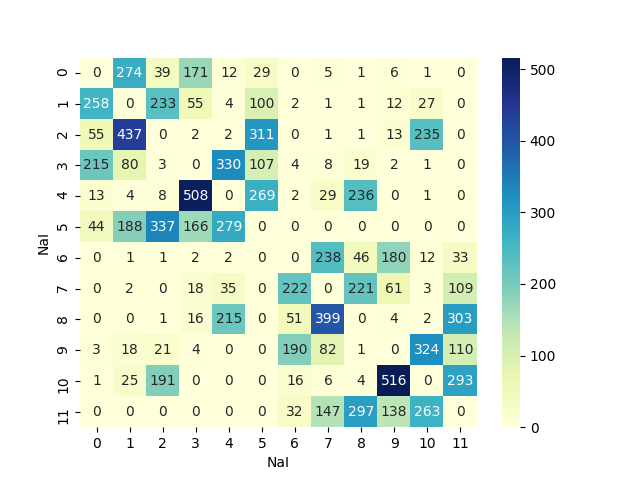

In [9]:
get_legal_pairs()

# Fermi plotting

<IPython.core.display.Javascript object>


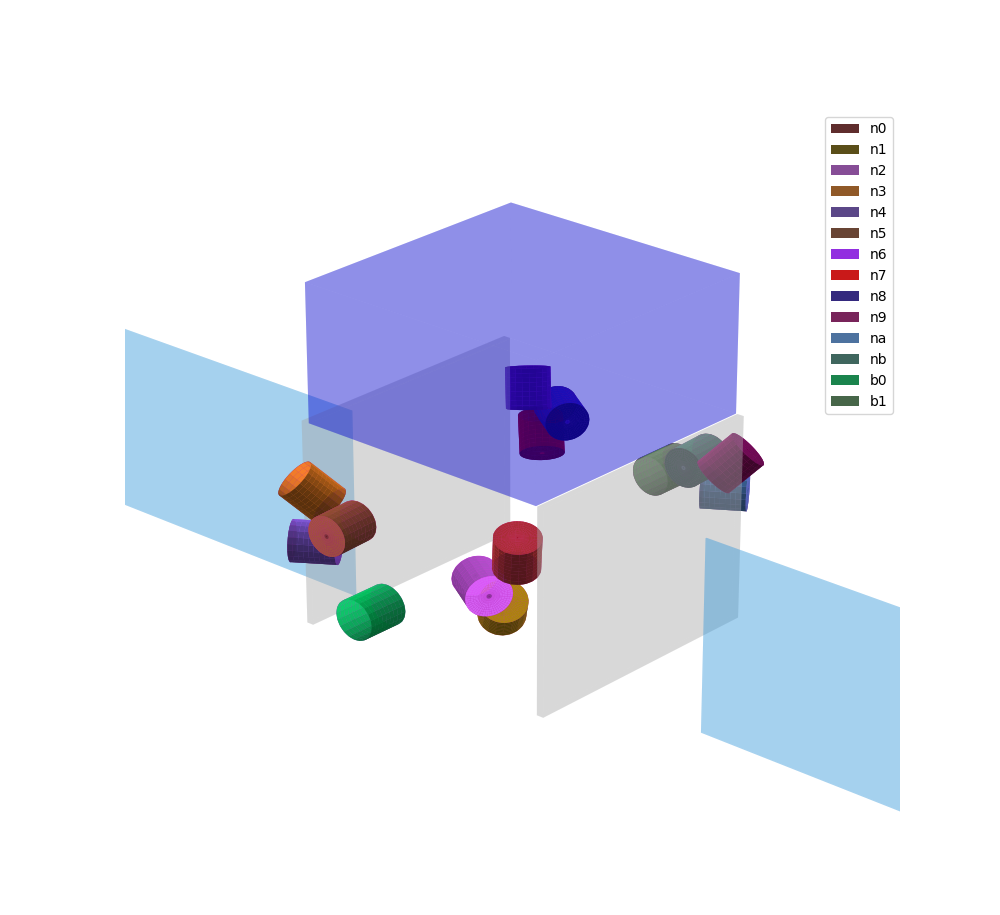

In [4]:
from gbmgeometry.spacecraft.fermi import *


f = Fermi(quaternion=[0,0,0,0], sc_pos=np.array([1,1,1]))
f.plot_fermi(color_dets_different=True, plot_det_label=False);